任务:基于transfer_data.csv数据，建立mlp模型，再实现模型迁移学习:
1.实现x对y的预测，可视化结果
2.基于新数据transfer_data2.csv，对前模型进行二次训练，对比模型训练次数少的情况下的表现
备注:模型结构:mlp，两个隐藏层，每层50个神经元，激活函数relu，输出层激活函数linear，迭代次数:100次

In [1]:
#load the data
import pandas as pd 
import numpy as np 
data = pd.read_csv('transfer_data.csv')
data.head()


,x,y
0,-5.0,35.11
1,-4.9,34.02
2,-4.8,33.01
3,-4.7,32.22
4,-4.6,31.05


In [2]:
#define x and y
x = data.loc[:,'x']
y = data.loc[:,'y']
x.head()

0   -5.0
1   -4.9
2   -4.8
3   -4.7
4   -4.6
Name: x, dtype: float64

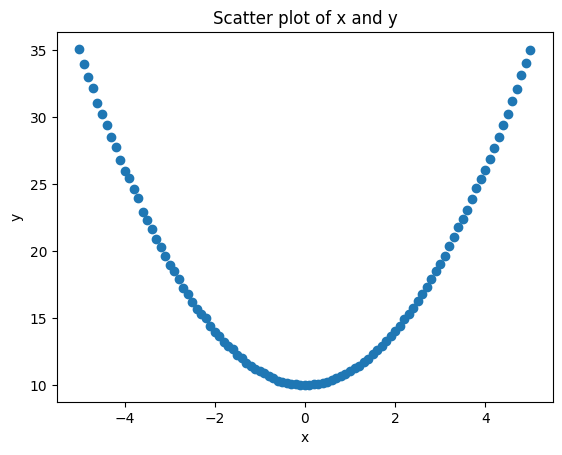

In [3]:
#visualize the data
import matplotlib.pyplot as plt
fig1 = plt.figure()
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()

In [9]:
#转换数据
x.shape
x = np.array(x).reshape(-1,1)
print(x.shape)
y.shape

(101, 1)


(101,)

In [11]:
#establiesh the mlp model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#x 是1维的，所以input_dim=1
#隐藏层500个神经元
model.add(Dense(units=50, input_dim=1, activation='relu'))
model.add(Dense(units=50, activation='relu'))
#输出层1个神经元,回归是线性的，所以激活函数是linear, 如果是分类，则激活函数是sigmoid或softmax
model.add(Dense(units=1, activation='linear'))
#损失函数mse
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-22 11:02:39.375012: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#训练模型
model.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8806 
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7847 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7436 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8193 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7234 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7790 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7742 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7085 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9015 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7430 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9016 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6285 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6748 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6383 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [22]:
#结果预测
y_predict = model.predict(x)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


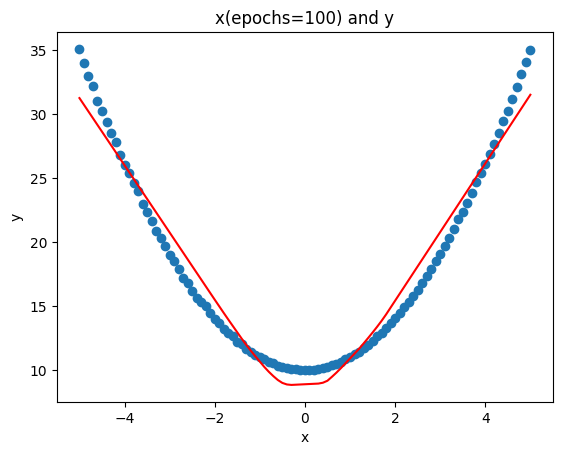

In [ ]:
#可视化效果
fig2 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x(epochs=100) and y')
plt.show()

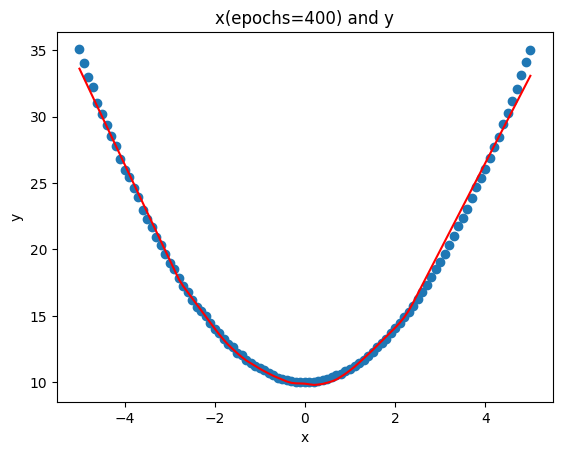

In [23]:
fig3 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x(epochs=400) and y')
plt.show()

In [25]:
#存储模型
import joblib
joblib.dump(model,'model1.m')


['model1.m']

In [26]:
#加载模型
mode2 = joblib.load('model1.m')  

In [37]:
data2 = pd.read_csv('transfer_data2.csv')
data2.head()

,x,y
0,-5.0,38.01
1,-4.9,36.78
2,-4.8,35.61
3,-4.7,34.55
4,-4.6,33.51


In [38]:
#define x and y
x2 = data2.loc[:, 'x']
y2 = data2.loc[:, 'y']
x2.head()

0   -5.0
1   -4.9
2   -4.8
3   -4.7
4   -4.6
Name: x, dtype: float64

In [39]:
x2 = np.array(x2).reshape(-1,1)
x2.shape

(101, 1)

In [41]:
y2_predict = mode2.predict(x2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


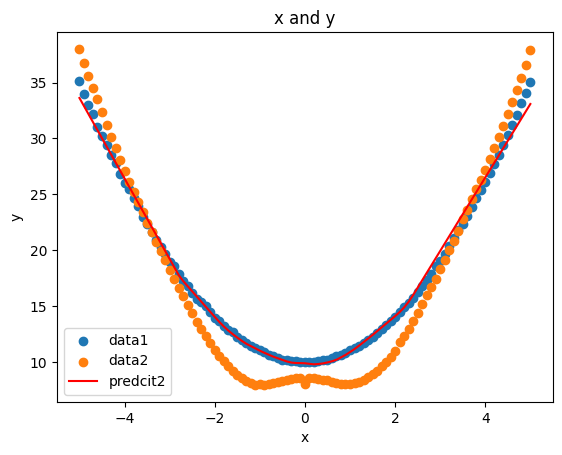

In [ ]:

fig4 = plt.figure()
plt.scatter(x,y, label='data1')
plt.scatter(x2,y2, label='data2')
plt.plot(x, y2_predict, 'r', label='predcit2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x and y')
plt.legend()
plt.show()

拟合的还是原始数据

In [49]:
#二次训练
mode2.fit(x2, y2, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6392 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5967 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6337 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5595 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6676 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5273 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3893 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5072 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5351 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3690 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3681 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3909 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3966 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3040 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2755 
Epoch 16/100
4/4 ━━

In [50]:
y2_predict = mode2.predict(x2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


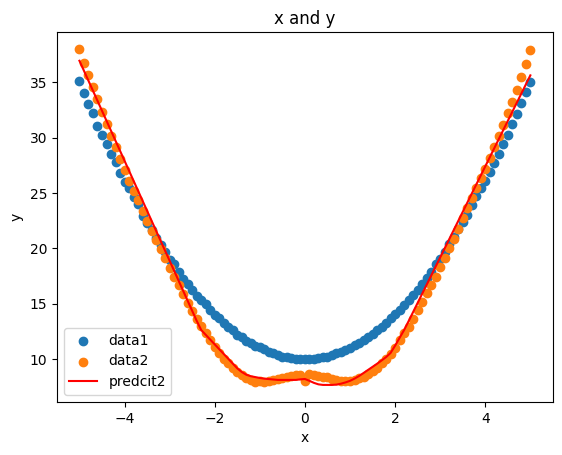

In [51]:
fig5 = plt.figure()
plt.scatter(x,y, label='data1')
plt.scatter(x2,y2, label='data2')
plt.plot(x, y2_predict, 'r', label='predcit2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x and y')
plt.legend()
plt.show()